In [2]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
for dirpath, dirname, filenames in os.walk('COVID_IEEE'):
    print(f'there are {len(filenames)} files in {dirpath}')

In [5]:
data_dir = pathlib.Path('COVID_IEEE')
class_name = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_name

array([], shape=(1, 0), dtype=float64)

In [7]:
def view_image(target, target_class):
    target_folder = os.path.join(target, target_class)  
    random_image = random.sample(os.listdir(target_folder), 1)[0] 
    print(random_image)  # Print the name of the random image
    img = mpimg.imread(os.path.join(target_folder, random_image))  # Correctly join the path to read the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return img

In [8]:
img =  view_image(data_dir, 'virus')

FileNotFoundError: [Errno 2] No such file or directory: 'COVID_IEEE/virus'

NORMAL2-IM-0880-0001.jpeg


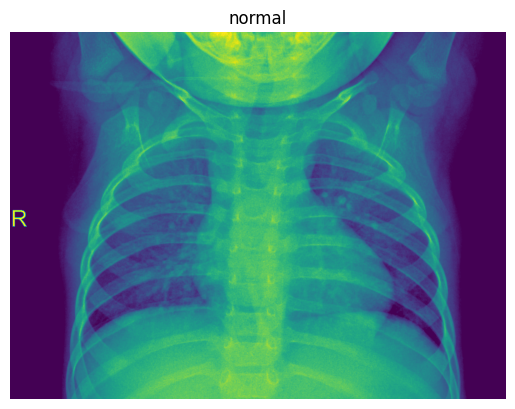

In [6]:
img =  view_image(data_dir, 'normal')

In [7]:
data = []
labels = []

for category, label in zip(['covid', 'normal', 'virus'], [0, 1, 2]):
    category_dir = os.listdir(f"{data_dir}/{category}")
    for image_file in category_dir:
        image_path = f"{data_dir}/{category}/{image_file}"
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (224, 224))
            data.append(image)
            labels.append(label)
        else:
            print(f"Warning: Could not read image {image_path}")

In [8]:
img_data = np.array(data) / 255.0 # this is for normalize the data , i need to devide for 255
img_labels = np.array(labels)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)

In [10]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [1]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32 ,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))

model.add(Dense(units=3, activation="softmax"))

model.add(Dropout(0.5))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241,315 (100.10 MB)

 Trainable params: 26,241,315 (100.10 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4841 - loss: 1.1160 - val_accuracy: 0.7283 - val_loss: 0.7099
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7678 - loss: 0.6659 - val_accuracy: 0.8493 - val_loss: 0.3860
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8736 - loss: 0.3558 - val_accuracy: 0.9018 - val_loss: 0.2833
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9247 - loss: 0.2569 - val_accuracy: 0.9201 - val_loss: 0.2339
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9528 - loss: 0.1520 - val_accuracy: 0.9315 - val_loss: 0.1831
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9542 - loss: 0.1423 - val_accuracy: 0.9361 - val_loss: 0.1892
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9648 - loss: 0.1295 - val_accuracy: 0.9087 - val_loss: 0.2352
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9622 - loss: 0.0863 - val_accuracy: 0.9338 - val_loss:

Text(0.5, 1.0, 'Training-Validation Accuracy')

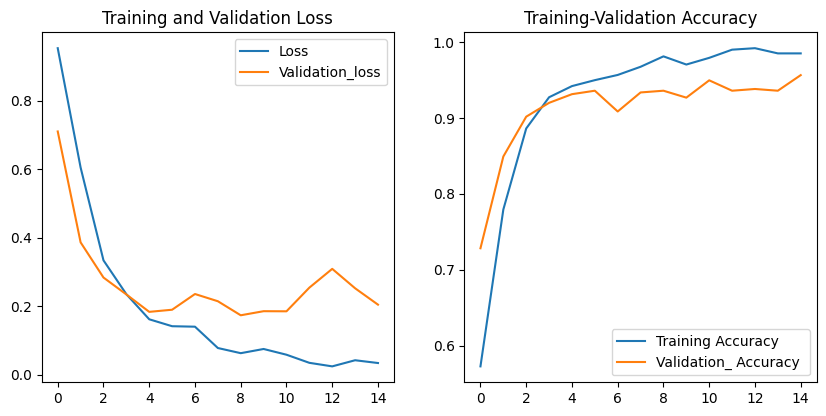

In [14]:

loss = pd.DataFrame(model.history.history)


plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")
     

In [15]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 459ms/step


In [16]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.90      0.97      0.93       129
           2       0.97      0.88      0.93       128

    accuracy                           0.94       365
   macro avg       0.94      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [17]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred),
             columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,2,1
normal,2,125,2
virus,3,12,113


In [18]:
import tensorflow as tf

weights_path = './mobilenet_1_0_224_tf_no_top.h5'

base_model = tf.keras.applications.MobileNet(input_shape=[224, 224, 3], weights=weights_path, include_top=False)

for layer in base_model.layers:
    layer.trainable = False


In [19]:

model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [20]:

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 55,267,011 (210.83 MB)

 Trainable params: 52,038,147 (198.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [22]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 746ms/step - accuracy: 0.6476 - loss: 16.1584 - val_accuracy: 0.9635 - val_loss: 0.4866
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 592ms/step - accuracy: 0.9386 - loss: 0.5285 - val_accuracy: 0.7603 - val_loss: 3.2626
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 658ms/step - accuracy: 0.9301 - loss: 1.3241 - val_accuracy: 0.9749 - val_loss: 0.5283
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 563ms/step - accuracy: 0.9933 - loss: 0.0720 - val_accuracy: 0.9772 - val_loss: 0.4976
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - accuracy: 0.9923 - loss: 0.0481 - val_accuracy: 0.9795 - val_loss: 0.4475
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.9888 - loss: 0.0664 - val_accuracy: 0.9566 - val_loss: 0.6629
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 586ms/step - accuracy: 0.9877 - loss: 0.0544 - val_accuracy: 0.9247 - val_loss: 1.2052
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 603ms/step - accuracy: 0.9845 - loss: 0.1594 - val_acc

Text(0.5, 1.0, 'Training-Validation Accuracy')

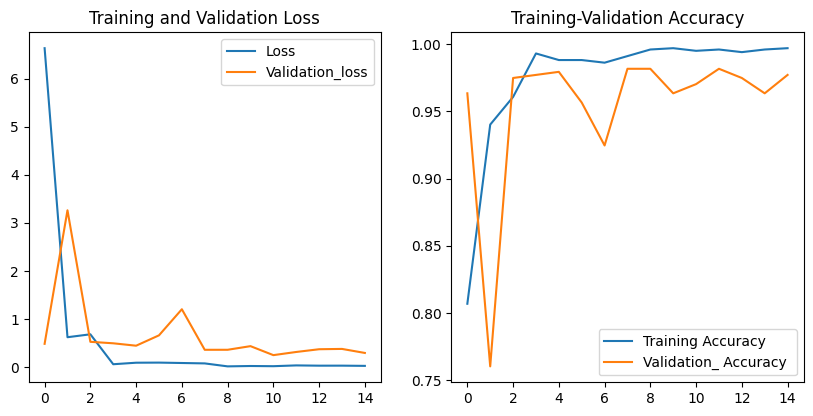

In [23]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [24]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step


In [26]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])
# Save the trained model
model.save('Covid_X_Ray_Predictor.h5')


In [27]:
model.save('my_model.h5')


In [28]:
convertor =  tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convertor.convert()
with open('models/Covid_X_Ray_Predictor.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s/assets


INFO:tensorflow:Assets written to: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s/assets


Saved artifact at '/var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_211')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  10841290512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  10841281872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  10841278224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205217104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205214224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205218064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205217296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  122052

W0000 00:00:1731967567.077555   17268 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1731967567.085138   17268 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-11-18 22:06:07.092355: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s
2024-11-18 22:06:07.095715: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-18 22:06:07.095723: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s
I0000 00:00:1731967567.129861   17268 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-18 22:06:07.136752: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-18 22:06:07.622635: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder